In [331]:
import pandas as pd

# Load data
df = pd.read_csv('/content/mcdonalds.csv')

# Convert YES/NO to binary
binary_cols = df.columns[:11]  # First 11 columns are perception variables
df[binary_cols] = df[binary_cols].map(lambda x: 1 if x == 'Yes' else 0)
df[binary_cols]

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1
1449,1,1,0,1,0,0,1,1,0,1,0
1450,1,1,0,1,0,1,0,1,1,0,0
1451,1,1,0,0,0,1,1,1,0,1,0


In [332]:
import pandas as pd

# Load the data
df = pd.read_csv('/content/mcdonalds.csv')

# Step 1: Extract first 11 columns (brand attributes)
MD_x = df.iloc[:, 0:11].copy()

# Step 2: Convert "Yes" to 1 and "No" to 0
MD_x_binary = MD_x.applymap(lambda x: 1 if x == "Yes" else 0)

# Step 3: Compute column-wise means (proportion of "Yes")
means = MD_x_binary.mean().round(2)

# Display
print(means)


yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


<ipython-input-332-8c09e07842fc>:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  MD_x_binary = MD_x.applymap(lambda x: 1 if x == "Yes" else 0)


In [333]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [334]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA()
MD_pca=pca.fit(MD_x_binary)

# Summary: Explained variance and cumulative variance
explained_var = pca.explained_variance_ratio_
cumulative_var = explained_var.cumsum()

# Display similar to R's summary
import pandas as pd
summary_df = pd.DataFrame({
    'PC': [f'PC{i+1}' for i in range(len(explained_var))],
    'Explained Variance': explained_var.round(4),
    'Cumulative Variance': cumulative_var.round(4)
})

print(summary_df)

      PC  Explained Variance  Cumulative Variance
0    PC1              0.2994               0.2994
1    PC2              0.1928               0.4922
2    PC3              0.1330               0.6253
3    PC4              0.0831               0.7084
4    PC5              0.0595               0.7679
5    PC6              0.0503               0.8182
6    PC7              0.0438               0.8620
7    PC8              0.0395               0.9016
8    PC9              0.0368               0.9383
9   PC10              0.0324               0.9707
10  PC11              0.0293               1.0000


In [335]:
import numpy as np
import pandas as pd

# Standard deviations of principal components
std_devs = np.sqrt(pca.explained_variance_)

# Loadings (eigenvectors): components_.T is equivalent to R's rotation matrix
loadings = pd.DataFrame(
    data=pca.components_.T,
    columns=[f'PC{i+1}' for i in range(len(pca.components_))],
    index=MD_x_binary.columns
).round(1)

# Print results
print("Standard deviations:")
print(np.round(std_devs, 1))

print("\nLoadings (PCA rotation matrix):")
print(loadings)


Standard deviations:
[0.8 0.6 0.5 0.4 0.3 0.3 0.3 0.3 0.3 0.2 0.2]

Loadings (PCA rotation matrix):
            PC1  PC2  PC3  PC4  PC5  PC6  PC7  PC8  PC9  PC10  PC11
yummy       0.5 -0.4  0.3  0.1  0.3 -0.2 -0.3 -0.0 -0.6   0.1  -0.0
convenient  0.2 -0.0  0.1 -0.1 -0.3  0.3 -0.1  0.1  0.0   0.7   0.5
spicy       0.0 -0.0  0.0  0.2 -0.1  0.4  0.7 -0.4 -0.4   0.1  -0.1
fattening  -0.1  0.0  0.3 -0.4  0.1  0.4 -0.4 -0.6  0.2   0.0  -0.3
greasy     -0.3  0.1  0.8  0.3 -0.4 -0.2  0.0  0.1  0.0  -0.0  -0.0
fast        0.1  0.1  0.1 -0.1 -0.1  0.6 -0.1  0.6 -0.2  -0.2  -0.3
cheap       0.3  0.6  0.1  0.1  0.1  0.1 -0.0 -0.1 -0.1  -0.4   0.5
tasty       0.5 -0.3  0.3 -0.0  0.2  0.1  0.4  0.1  0.6  -0.1  -0.0
expensive  -0.3 -0.6 -0.0  0.1  0.0  0.3 -0.1 -0.0 -0.1  -0.5   0.5
healthy     0.2 -0.1 -0.2  0.8 -0.3  0.2 -0.3 -0.2  0.2   0.0  -0.2
disgusting -0.4  0.1  0.1  0.4  0.7  0.2 -0.0  0.2  0.1   0.3   0.0


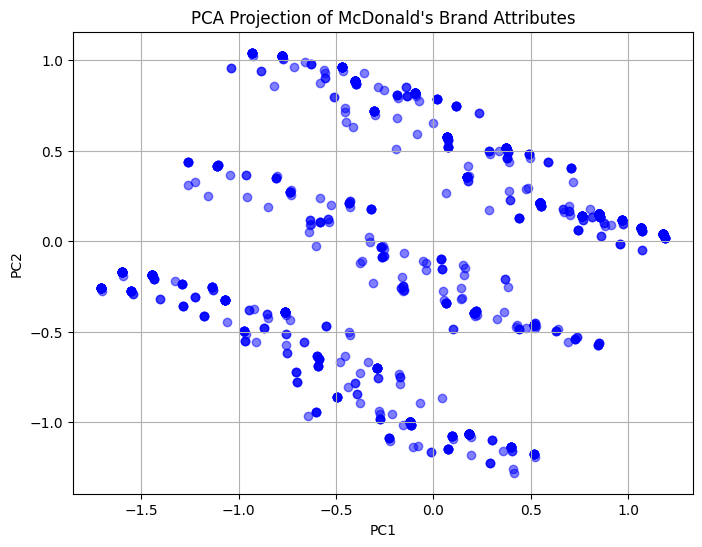

In [336]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
pca_components = pca.fit_transform(MD_x_binary)

# Plotting PCA
plt.figure(figsize=(8,6))
plt.scatter(pca_components[:,0], pca_components[:,1], alpha=0.5, color='blue')
plt.title("PCA Projection of McDonald's Brand Attributes")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()

In [337]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(MD_x_binary)

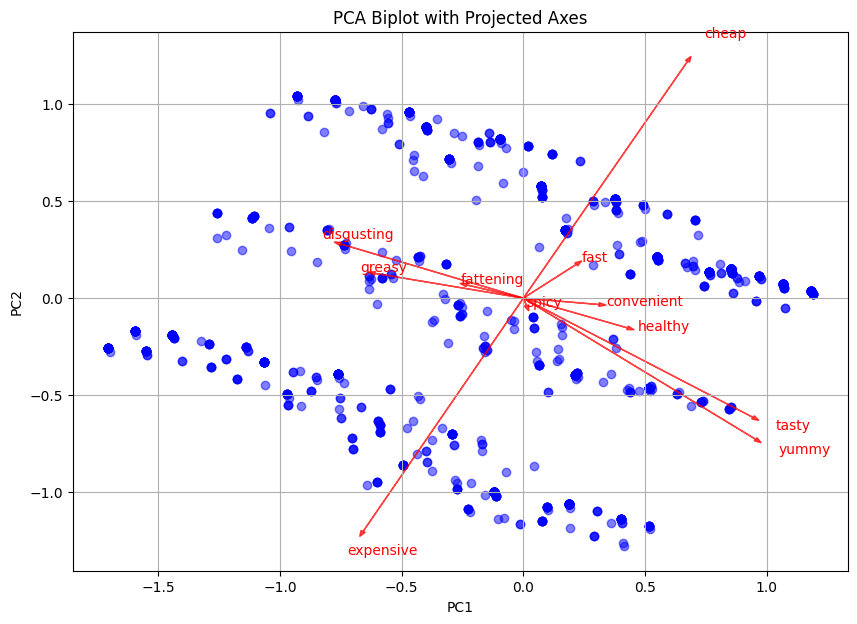

In [338]:
import matplotlib.pyplot as plt

def biplot(score, coeff, labels=None):
    xs = score[:, 0]
    ys = score[:, 1]
    n = coeff.shape[0]

    plt.figure(figsize=(10, 7))
    plt.scatter(xs, ys, alpha=0.5, color='blue')  # Equivalent to col = "blue"

    for i in range(n):
        plt.arrow(0, 0, coeff[i, 0]*2, coeff[i, 1]*2,
                  color='red', alpha=0.7, head_width=0.02)
        if labels is not None:
            plt.text(coeff[i, 0]*2.2, coeff[i, 1]*2.2, labels[i],
                     color='red', fontsize=10)

    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.title("PCA Biplot with Projected Axes")
    plt.grid(True)
    plt.show()

# Execute biplot
biplot(pca_components, pca.components_.T, labels=MD_x_binary.columns)


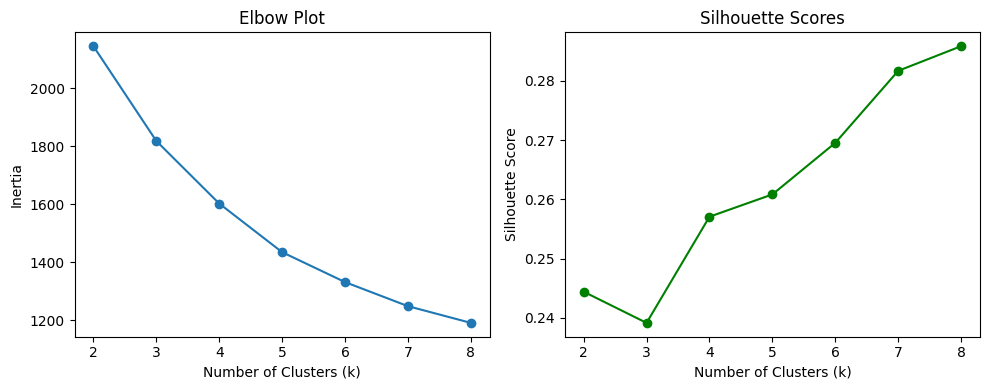

In [339]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

import numpy as np

# Track results
inertias = []
silhouette_scores = []
k_range = range(2, 9)

# Run KMeans for k = 2 to 8
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=1234, n_init=10)
    labels = kmeans.fit_predict(MD_x_binary)

    inertias.append(kmeans.inertia_)  # Similar to total within-cluster sum of squares
    silhouette_scores.append(silhouette_score(MD_x_binary, labels))

# Plot Inertia (Elbow Method)
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
plt.plot(k_range, inertias, marker='o')
plt.title('Elbow Plot')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')

# Plot Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, marker='o', color='green')
plt.title('Silhouette Scores')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()


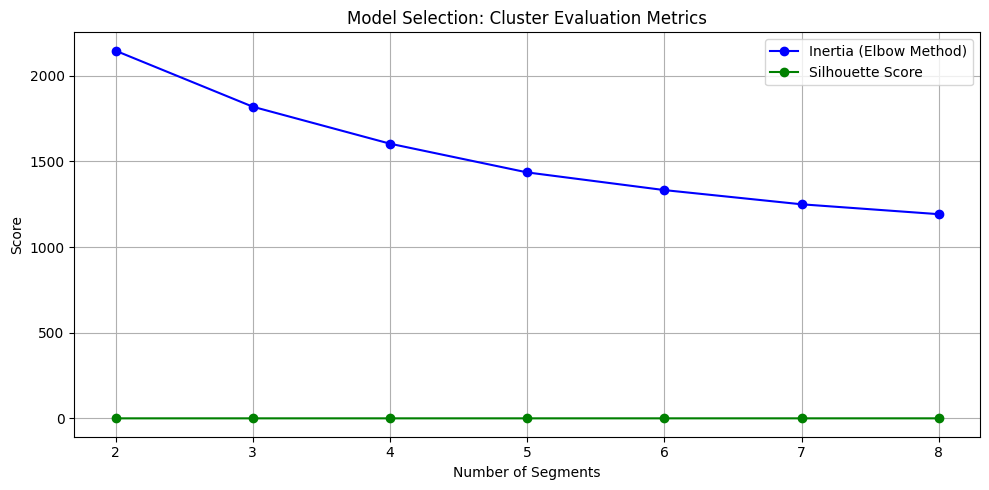

In [340]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

# Plot Inertia (Elbow method)
plt.plot(k_range, inertias, marker='o', label='Inertia (Elbow Method)', color='blue')
# Plot Silhouette Score
plt.plot(k_range, silhouette_scores, marker='o', label='Silhouette Score', color='green')

plt.title('Model Selection: Cluster Evaluation Metrics')
plt.xlabel('Number of Segments')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.xticks(k_range)
plt.tight_layout()
plt.show()


In [341]:
!pip install --upgrade scikit-learn

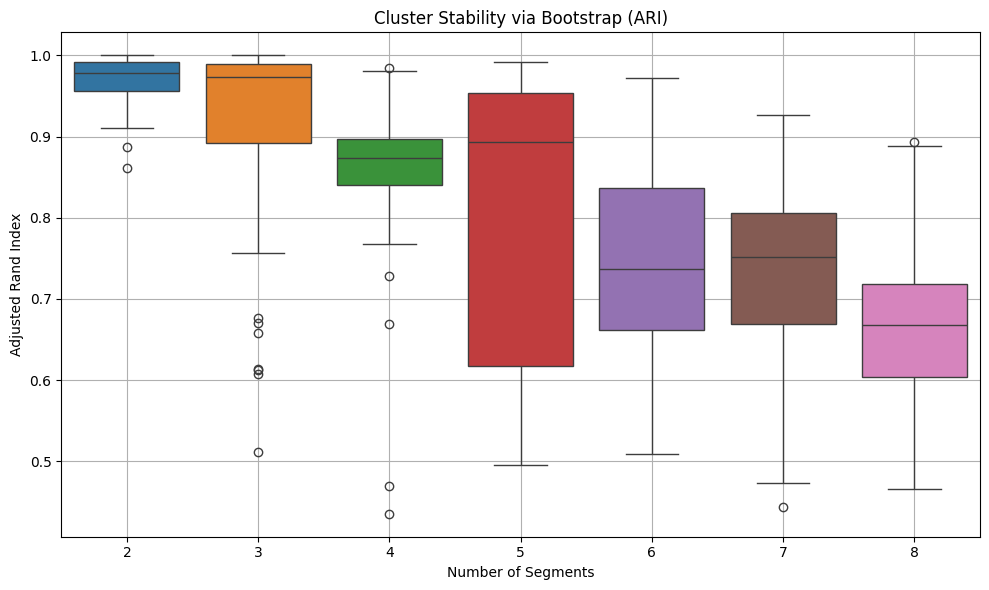

In [342]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Prepare data
X = MD_x_binary.values
n_samples = len(X)
n_boot = 100
k_range = range(2, 9)
random_state = 1234

# Store ARI scores
ari_scores = {k: [] for k in k_range}
np.random.seed(random_state)

for k in k_range:
    # Original clustering
    original_kmeans = KMeans(n_clusters=k, n_init=10, random_state=random_state)
    original_labels = original_kmeans.fit_predict(X)

    for _ in range(n_boot):
        # Generate bootstrap indices manually
        bootstrap_indices = np.random.choice(n_samples, size=n_samples, replace=True)
        X_bootstrap = X[bootstrap_indices]

        # Fit KMeans on bootstrap sample
        boot_kmeans = KMeans(n_clusters=k, n_init=10, random_state=None)
        boot_labels = boot_kmeans.fit_predict(X_bootstrap)

        # Find shared (unique) indices in original data
        shared_indices = np.unique(bootstrap_indices)

        # Get corresponding labels from original and bootstrap
        original_partial = original_labels[shared_indices]
        boot_partial = []

        for i in shared_indices:
            # Find *first* occurrence of i in bootstrap_indices to map boot label
            match_idx = np.where(bootstrap_indices == i)[0][0]
            boot_partial.append(boot_labels[match_idx])

        # Calculate ARI
        ari = adjusted_rand_score(original_partial, boot_partial)
        ari_scores[k].append(ari)

# Plot ARI Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=[ari_scores[k] for k in k_range])
plt.xticks(ticks=np.arange(len(k_range)), labels=k_range)
plt.xlabel('Number of Segments')
plt.ylabel('Adjusted Rand Index')
plt.title('Cluster Stability via Bootstrap (ARI)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [343]:
#df = pd.read_csv('/content/mcdonalds.csv')

# Convert YES/NO to binary
#binary_cols = df.columns[:11]  # First 11 columns are perception variables
#df[binary_cols] = df[binary_cols].map(lambda x: 1 if x == 'Yes' else 0)

#kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
#df['cluster'] = kmeans.fit_predict(MD_x_binary)

# Calculate cluster-wise means (proportion of "Yes") for each attribute
#cluster_profiles = df.groupby('cluster')[binary_cols].mean().T
#cluster_profiles

<Figure size 1400x600 with 0 Axes>

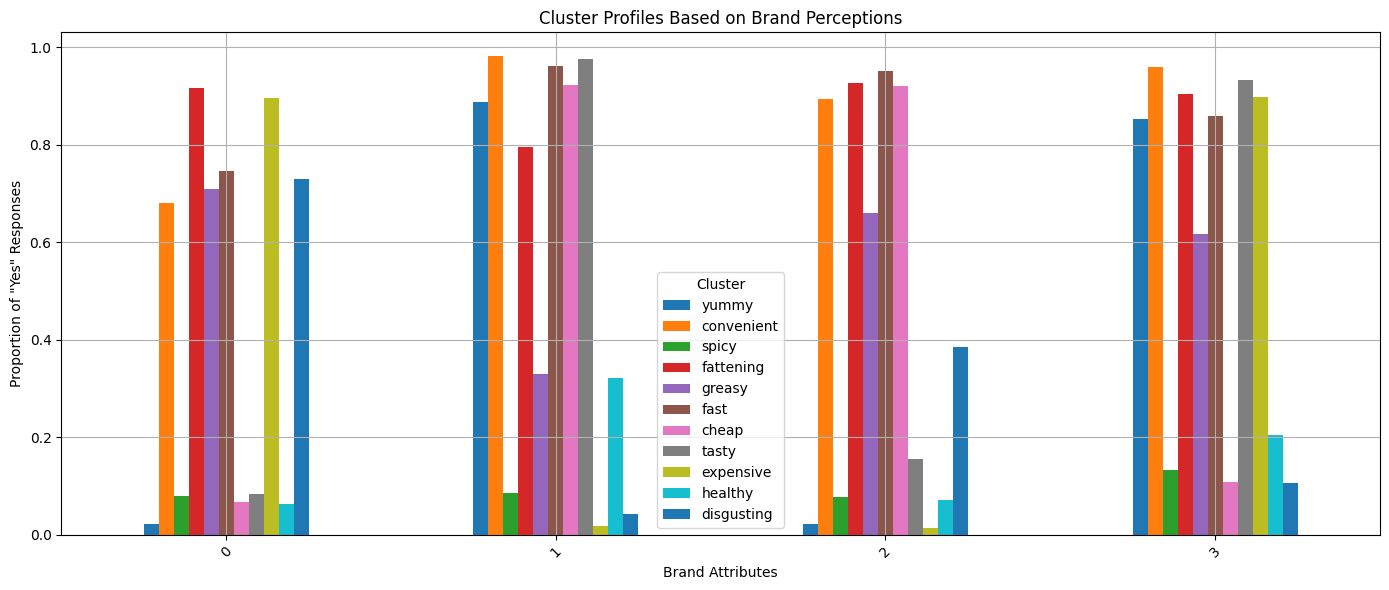

In [344]:
import matplotlib.pyplot as plt

# Ensure the binary data and cluster labels are merged
#MD_x_binary['cluster'] = df['cluster']  # copy cluster labels into the binary frame

#cluster_profiles = df.groupby('cluster')[MD_x_binary].mean()

# Plot as bar chart
plt.figure(figsize=(14, 6))
cluster_profiles.plot(kind='bar', figsize=(14, 6))
plt.title('Cluster Profiles Based on Brand Perceptions')
plt.xlabel('Brand Attributes')
plt.ylabel('Proportion of "Yes" Responses')
plt.xticks(rotation=45)
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()


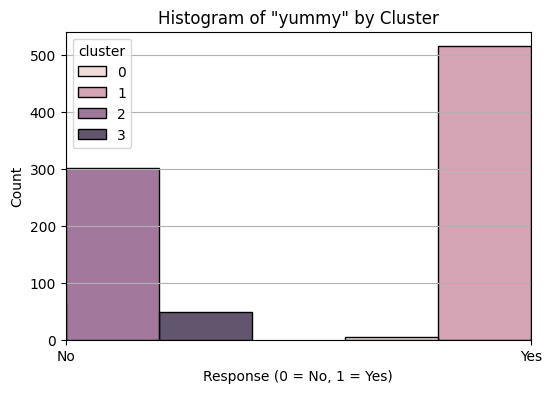

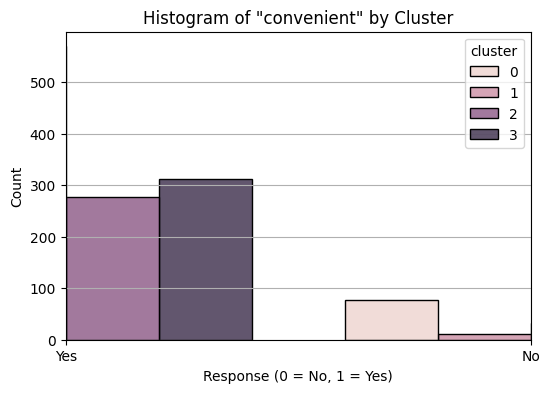

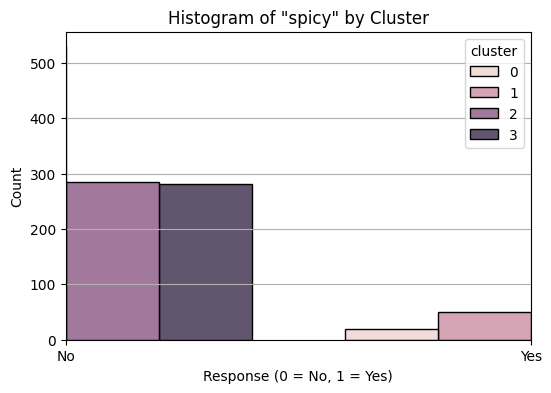

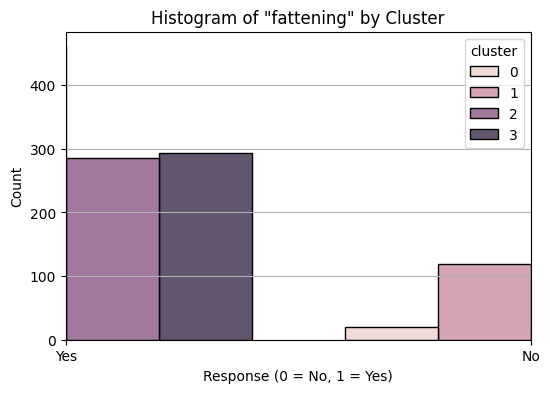

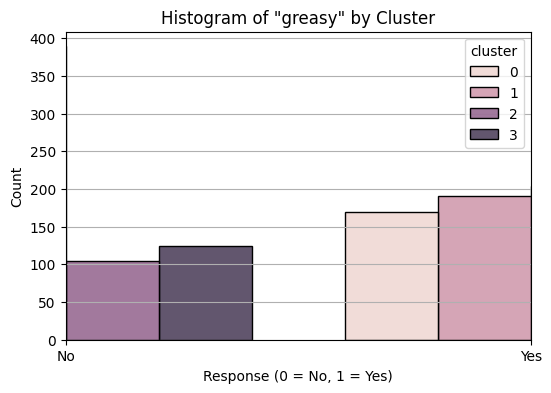

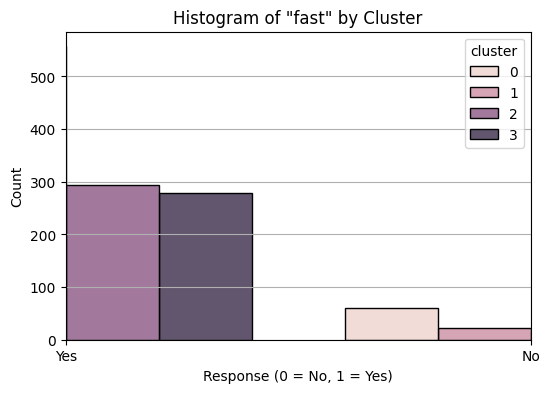

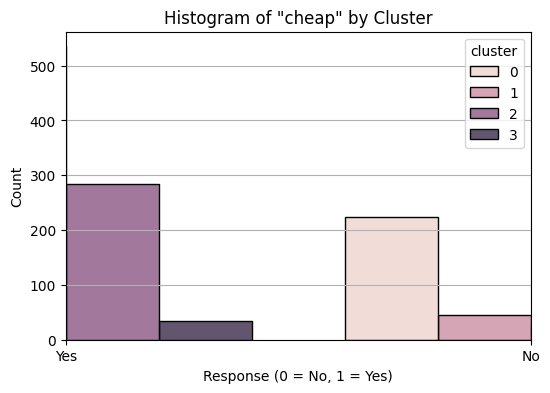

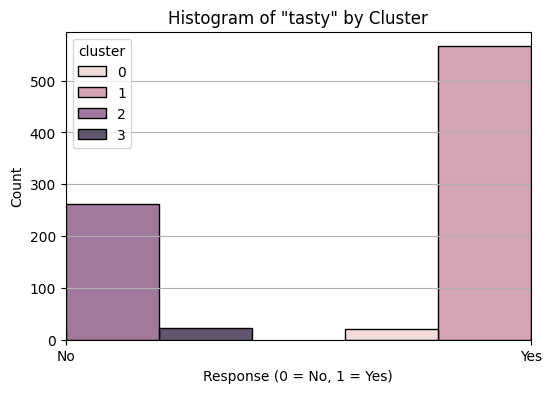

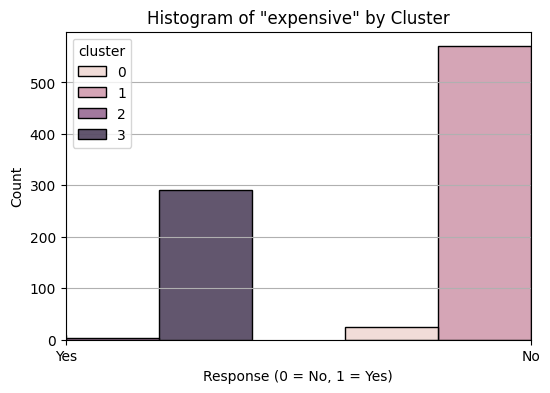

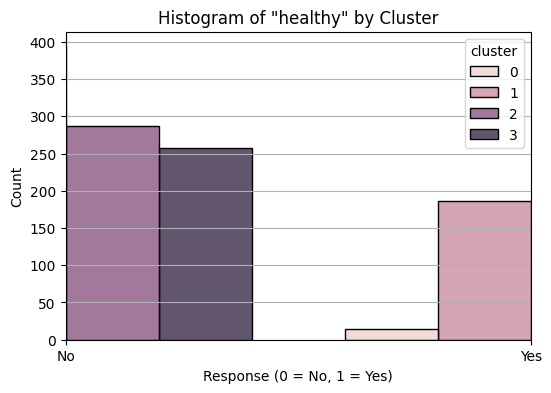

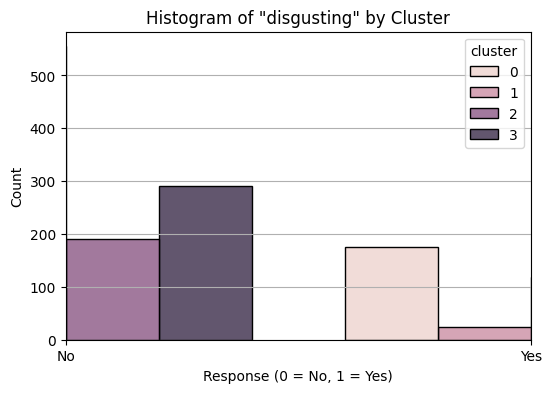

In [345]:
import seaborn as sns

# Plot histogram of a single attribute across clusters
for i in MD_x_binary:
  attribute = i
  plt.figure(figsize=(6, 4))
  sns.histplot(data=df, x=attribute, hue='cluster', multiple='dodge', discrete=True, shrink=0.8)
  plt.title(f'Histogram of "{attribute}" by Cluster')
  plt.xlim(0, 1)
  plt.xlabel('Response (0 = No, 1 = Yes)')
  plt.ylabel('Count')
  plt.grid(True)
  plt.show()


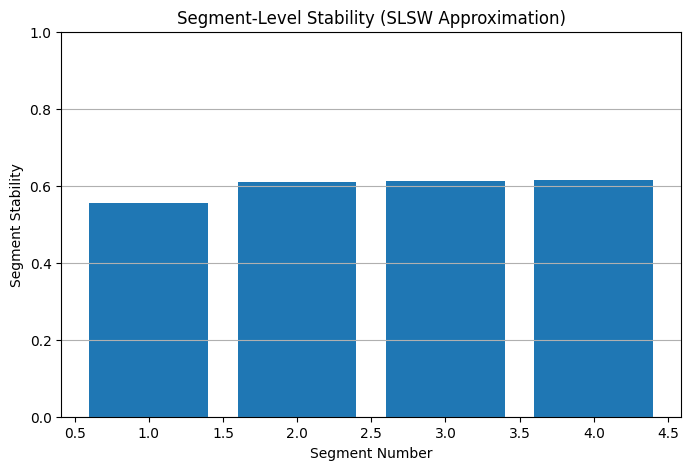

In [346]:
from sklearn.cluster import KMeans
from sklearn.utils import resample
import numpy as np
import matplotlib.pyplot as plt

# Setup
X = MD_x_binary.drop(columns='cluster', errors='ignore').values
k = 4
n_boot = 100
n_samples = X.shape[0]
random_state = 1234

# Original clustering
kmeans_orig = KMeans(n_clusters=k, n_init=10, random_state=random_state)
labels_orig = kmeans_orig.fit_predict(X)

# Initialize match counts for each cluster
match_counts = np.zeros(k)

# Run bootstrap simulations
for _ in range(n_boot):
    indices = np.random.choice(n_samples, size=n_samples, replace=True)
    X_bootstrap = X[indices]

    kmeans_boot = KMeans(n_clusters=k, n_init=10)
    labels_boot = kmeans_boot.fit_predict(X_bootstrap)

    # Match each cluster in original to best-matching in bootstrap
    for i in range(k):
        # Get data points in original cluster i
        orig_members = np.where(labels_orig == i)[0]
        intersect = []

        for j in range(k):
            # Map indices from original space to bootstrap sample
            boot_members = np.array(indices)[labels_boot == j]
            overlap = len(np.intersect1d(orig_members, boot_members))
            intersect.append(overlap)

        # Stability = max overlap proportionally
        max_overlap = max(intersect)
        match_counts[i] += max_overlap / len(orig_members)

# Normalize to get mean stability per segment
segment_stability = match_counts / n_boot

# 📊 Plot the segment-level stability
plt.figure(figsize=(8, 5))
plt.bar(np.arange(1, k + 1), segment_stability)
plt.ylim(0, 1)
plt.xlabel("Segment Number")
plt.ylabel("Segment Stability")
plt.title("Segment-Level Stability (SLSW Approximation)")
plt.grid(True, axis='y')
plt.show()

<ipython-input-347-d86ac4d1da81>:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=box_df, x="Segment", y="Stability", palette="pastel")


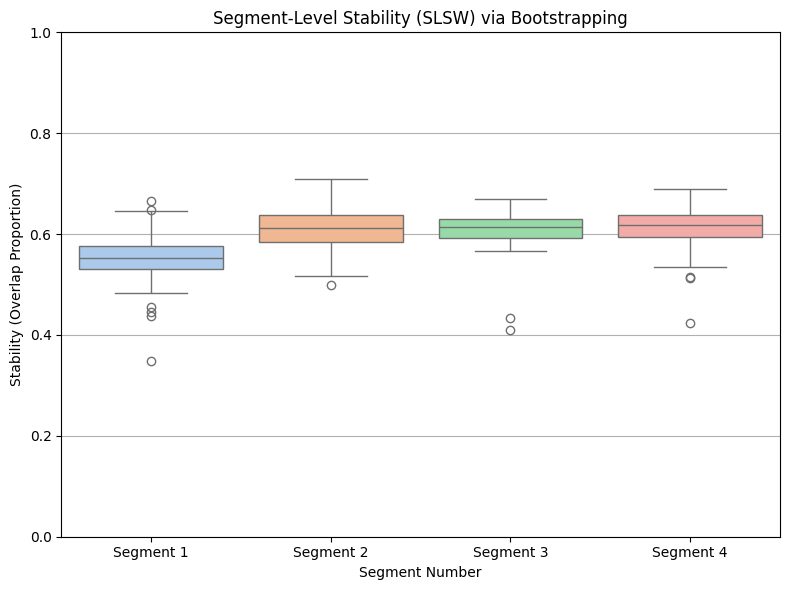

In [347]:
from sklearn.cluster import KMeans
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Setup
X = MD_x_binary.drop(columns='cluster', errors='ignore').values
k = 4
n_boot = 100
n_samples = X.shape[0]
random_state = 1234

# Original clustering
kmeans_orig = KMeans(n_clusters=k, n_init=10, random_state=random_state)
labels_orig = kmeans_orig.fit_predict(X)

# Track overlap proportions for each cluster
segment_stability_scores = {i: [] for i in range(k)}

np.random.seed(random_state)

for _ in range(n_boot):
    indices = np.random.choice(n_samples, size=n_samples, replace=True)
    X_boot = X[indices]

    kmeans_boot = KMeans(n_clusters=k, n_init=10)
    labels_boot = kmeans_boot.fit_predict(X_boot)

    for i in range(k):
        orig_members = np.where(labels_orig == i)[0]

        # Compute overlap of original cluster with each bootstrap cluster
        overlaps = []
        for j in range(k):
            boot_members = np.array(indices)[labels_boot == j]
            overlap = len(np.intersect1d(orig_members, boot_members))
            overlaps.append(overlap)

        # Track best overlap proportion
        best_overlap = max(overlaps) / len(orig_members)
        segment_stability_scores[i].append(best_overlap)

# Prepare data for seaborn boxplot
box_data = []
for cluster_id, scores in segment_stability_scores.items():
    for score in scores:
        box_data.append({"Segment": f"Segment {cluster_id+1}", "Stability": score})

# Convert to DataFrame
box_df = pd.DataFrame(box_data)

# Plot boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=box_df, x="Segment", y="Stability", palette="pastel")
plt.ylim(0, 1)
plt.title("Segment-Level Stability (SLSW) via Bootstrapping")
plt.xlabel("Segment Number")
plt.ylabel("Stability (Overlap Proportion)")
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


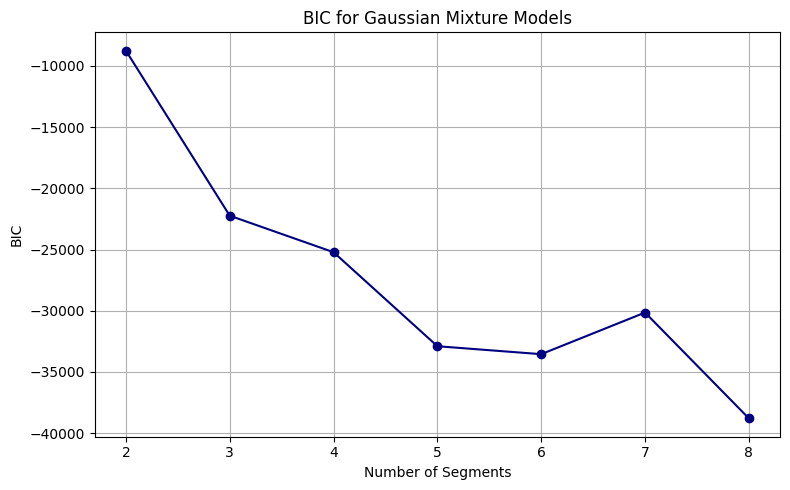

In [348]:
from sklearn.mixture import GaussianMixture
import numpy as np
import matplotlib.pyplot as plt

X = MD_x_binary.drop(columns='cluster', errors='ignore').values
k_range = range(2, 9)
bics = []
models = []

for k in k_range:
    try:
        model = GaussianMixture(n_components=k, covariance_type='full', random_state=1234)
        model.fit(X)
        models.append(model)
        bics.append(model.bic(X))
    except Exception as e:
        print(f"Model failed for k={k}: {e}")
        models.append(None)
        bics.append(np.nan)

# Plot BIC scores
plt.figure(figsize=(8, 5))
plt.plot(k_range, bics, marker='o', color='navy')
plt.title("BIC for Gaussian Mixture Models")
plt.xlabel("Number of Segments")
plt.ylabel("BIC")
plt.grid(True)
plt.tight_layout()
plt.show()


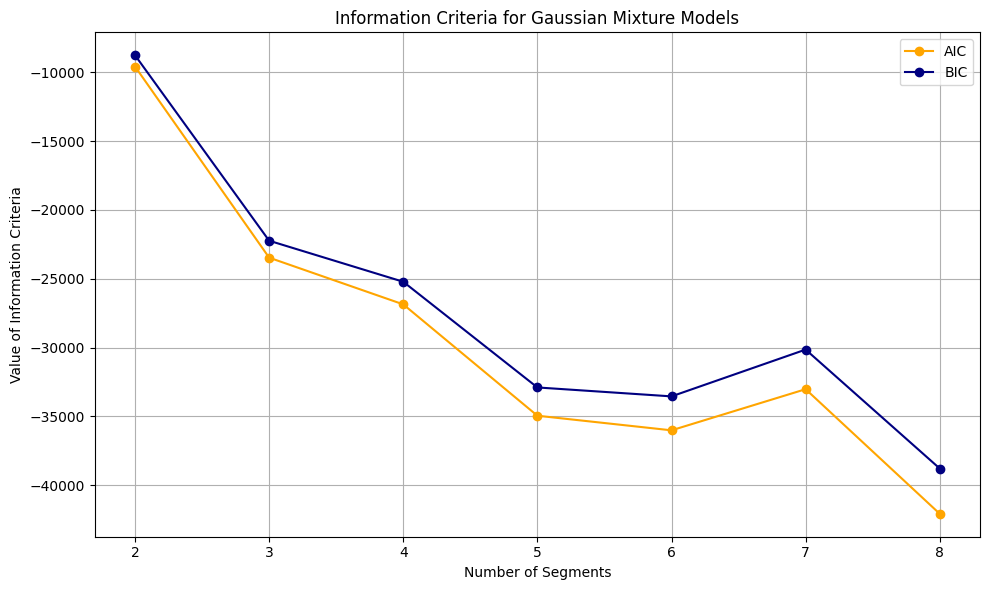

In [349]:
import matplotlib.pyplot as plt

aics = [model.aic(X) if model else None for model in models]
bics = [model.bic(X) if model else None for model in models]

plt.figure(figsize=(10, 6))
plt.plot(k_range, aics, marker='o', label='AIC', color='orange')
plt.plot(k_range, bics, marker='o', label='BIC', color='navy')
plt.title('Information Criteria for Gaussian Mixture Models')
plt.xlabel('Number of Segments')
plt.ylabel('Value of Information Criteria')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [350]:
def compute_icl(model, X):
    bic = model.bic(X)
    probs = model.predict_proba(X)
    entropy = -np.sum(probs * np.log(probs + 1e-10))
    return bic + entropy

icls = [compute_icl(model, X) if model else None for model in models]


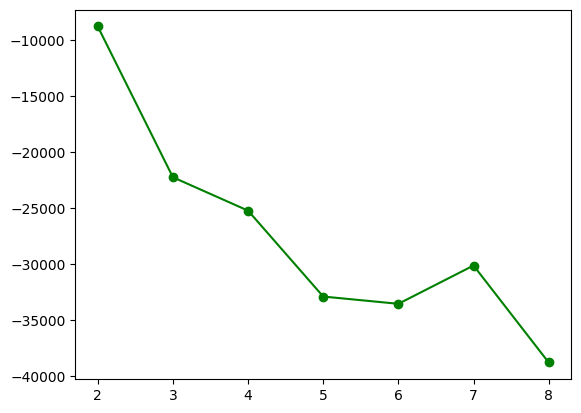

In [351]:
plt.plot(k_range, icls, marker='o', label='ICL', color='green')

In [352]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

# Step 1: Get labels from both models
kmeans_labels = kmeans.predict(X)        # KMeans 4-cluster solution
gmm_labels = models[2].predict(X)        # GMM 4-cluster solution (index 2 corresponds to k=4)

# Step 2: Create cross-tabulation
comparison_table = pd.crosstab(
    pd.Series(kmeans_labels, name="KMeans"),
    pd.Series(gmm_labels, name="GMM")
)

# Display the table
print("Contingency Table: KMeans vs GMM Cluster Assignments")
print(comparison_table)

Contingency Table: KMeans vs GMM Cluster Assignments
GMM       0    1    2    3
KMeans                    
0         1   20    0  147
1         0   24  152    3
2        84    4    2   24
3         0  167    5    3
4       241    0    2   13
5         6   24    0   95
6        18   15  115    3
7       271    0    1   13


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [353]:
import pandas as pd
import numpy as np

# Initialize summary storage
summary = []

for i, k in enumerate(k_range):  # k_range = range(2, 9)
    model = models[i]
    if model is not None:
        logLik = model.score(X) * X.shape[0]  # total log-likelihood
        AIC = model.aic(X)
        BIC = model.bic(X)

        # Approximate ICL = BIC + entropy penalty
        probs = model.predict_proba(X)
        entropy = -np.sum(probs * np.log(probs + 1e-10))
        ICL = BIC + entropy

        summary.append({
            "k": k,
            "logLik": round(logLik, 3),
            "AIC": round(AIC, 2),
            "BIC": round(BIC, 2),
            "ICL": round(ICL, 2),
            "iter": model.n_iter_,
            "converged": model.converged_
        })

# Convert to DataFrame
summary_df = pd.DataFrame(summary)

# Display
print(summary_df)


   k     logLik       AIC       BIC       ICL  iter  converged
0  2   4943.616  -9577.23  -8758.62  -8758.62     5       True
1  3  11965.368 -23464.74 -22234.17 -22234.17     7       True
2  4  13740.704 -26859.41 -25216.90 -25216.90    10       True
3  5  17863.944 -34949.89 -32895.43 -32893.15    11       True
4  6  18472.533 -36011.07 -33544.66 -33542.44     7       True
5  7  17056.143 -33022.29 -30143.93 -30120.87    13       True
6  8  21660.999 -42076.00 -38785.70 -38785.30     9       True


In [354]:
import numpy as np

X = MD_x_binary.drop(columns='cluster', errors='ignore').values

# Estimate initial means for GMM from KMeans clusters
initial_means = np.array([X[kmeans_labels == i].mean(axis=0) for i in range(k)])

# Fit GMM with manual initialization
gmm = GaussianMixture(n_components=k, covariance_type='diag',
                      init_params='random', random_state=1234)
gmm.means_init = initial_means
gmm.fit(X)

gmm_labels = gmm.predict(X)


In [355]:
comparison_table = pd.crosstab(
    pd.Series(kmeans_labels, name="kmeans"),
    pd.Series(gmm_labels, name="mixture")
)

print("Contingency Table: KMeans vs GMM (initialized with KMeans clusters)")
print(comparison_table)

Contingency Table: KMeans vs GMM (initialized with KMeans clusters)
mixture   0    1    2    3    4    5   6    7
kmeans                                       
0        55    0    5    0    1  107   0    0
1         1  135    3   25    0   11   4    0
2         0    2  108    0    0    4   0    0
3        15    0    1  155    0    2   2    0
4         0    0    5    0  205   40   6    0
5         9    0    9    0    0  106   1    0
6        16   88    1    2   14    0  30    0
7         1    0   26    0    0   28   8  222


In [356]:
# Frequency count of each value in 'Like', sorted in reverse order
like_counts = df['Like'].value_counts().sort_index(ascending=False)

print(like_counts)

Like
I love it!+5    143
I hate it!-5    152
0               169
-4               71
-3               73
-2               59
-1               58
+4              160
+3              229
+2              187
+1              152
Name: count, dtype: int64


In [357]:
# Convert to numeric (if not already)
like_mapping = {
    "I love it!+5": 5,
    "+4": 4,
    "+3": 3,
    "+2": 2,
    "+1": 1,
    "0 (neutral)": 0,
    "0": 0,
    "-1": -1,
    "-2": -2,
    "-3": -3,
    "-4": -4,
    "I hate it!-5": -5
}

In [358]:
# Convert to numeric (if not already)
#df['Like_n'] = pd.to_numeric(df['Like'], errors='coerce')

# Reverse the scale: 5 → 1, 4 → 2, ..., 1 → 5
df['Like_n'] = 6 - df['Like'].map(like_mapping)

# Frequency table of updated values
like_n_counts = df['Like_n'].value_counts().sort_index()

print(like_n_counts)

Like_n
1     143
2     160
3     229
4     187
5     152
6     169
7      58
8      59
9      73
10     71
11    152
Name: count, dtype: int64


In [359]:
# Get first 11 column names (predictors)
predictors = df.columns[:11].tolist()

# Response variable
response = 'Like_n'

# Build formula string
formula = f"{response} ~ {' + '.join(predictors)}"

print(formula)

Like_n ~ yummy + convenient + spicy + fattening + greasy + fast + cheap + tasty + expensive + healthy + disgusting


In [360]:
from sklearn.mixture import GaussianMixture

X = MD_x_binary[predictors].values  # predictors from earlier
gmm = GaussianMixture(n_components=2, random_state=1234)
clusters = gmm.fit_predict(X)

df['cluster'] = clusters

In [361]:
import statsmodels.formula.api as smf

models = {}
for cluster_id in sorted(df['cluster'].unique()):
    subset = df[df['cluster'] == cluster_id]
    model = smf.ols(formula=formula, data=subset).fit()
    models[cluster_id] = model
    print(f"--- Cluster {cluster_id} ---")
    print(model.summary())

--- Cluster 0 ---
                            OLS Regression Results                            
Dep. Variable:                 Like_n   R-squared:                       0.425
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     35.77
Date:                Wed, 04 Jun 2025   Prob (F-statistic):           3.67e-57
Time:                        16:17:21   Log-Likelihood:                -1182.9
No. Observations:                 545   AIC:                             2390.
Df Residuals:                     533   BIC:                             2441.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           

In [362]:
# Cluster size summary (like R's output)
cluster_sizes = df['cluster'].value_counts().sort_index()

# Print nicely like R
print("Cluster sizes:")
for cluster_id, size in cluster_sizes.items():
    print(f"{cluster_id + 1}  {size}")

print(f"\nConvergence after {gmm.n_iter_} iterations")

Cluster sizes:
1  545
2  908

Convergence after 5 iterations


In [363]:
import statsmodels.formula.api as smf

# Store regression models
regression_models = {}

print("Segment-wise regression summaries:\n")
for cluster_id in sorted(df['cluster'].unique()):
    subset = df[df['cluster'] == cluster_id]

    model = smf.ols(formula=formula, data=subset).fit()
    regression_models[cluster_id] = model

    print(f"--- Segment {cluster_id + 1} ---")  # +1 to match R labeling
    print(model.summary())
    print("\n")

Segment-wise regression summaries:

--- Segment 1 ---
                            OLS Regression Results                            
Dep. Variable:                 Like_n   R-squared:                       0.425
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     35.77
Date:                Wed, 04 Jun 2025   Prob (F-statistic):           3.67e-57
Time:                        16:17:21   Log-Likelihood:                -1182.9
No. Observations:                 545   AIC:                             2390.
Df Residuals:                     533   BIC:                             2441.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

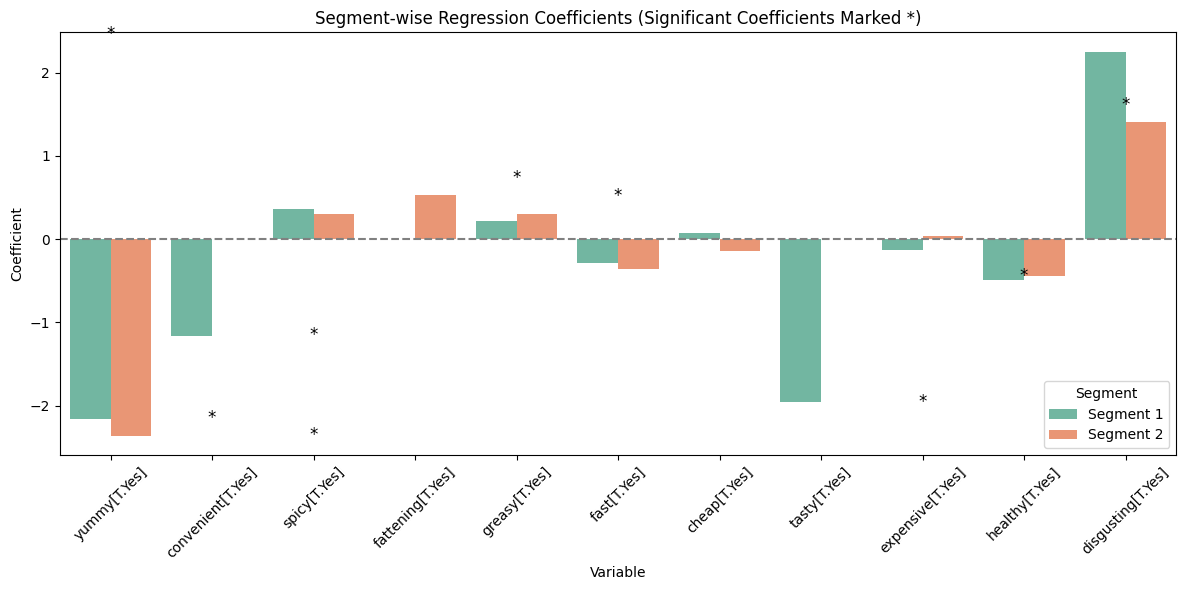

In [364]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Collect coefficients and p-values per cluster
coeff_data = []

for cluster_id, model in regression_models.items():
    for var, coef, pval in zip(model.params.index, model.params.values, model.pvalues.values):
        coeff_data.append({
            "Segment": f"Segment {cluster_id + 1}",
            "Variable": var,
            "Coefficient": coef,
            "Significant": pval < 0.05
        })

coeff_df = pd.DataFrame(coeff_data)

# Remove Intercept if not needed
coeff_df = coeff_df[coeff_df['Variable'] != 'Intercept']

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=coeff_df,
    x="Variable", y="Coefficient",
    hue="Segment",
    palette="Set2"
)

# Highlight significant bars
for i, row in coeff_df.iterrows():
    if row["Significant"]:
        plt.text(
            x=i % len(coeff_df['Variable'].unique()),
            y=row["Coefficient"] + 0.1 * np.sign(row["Coefficient"]),
            s="*", ha='center', va='bottom', fontsize=12, color='black'
        )

plt.title("Segment-wise Regression Coefficients (Significant Coefficients Marked *)")
plt.axhline(0, color='gray', linestyle='--')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

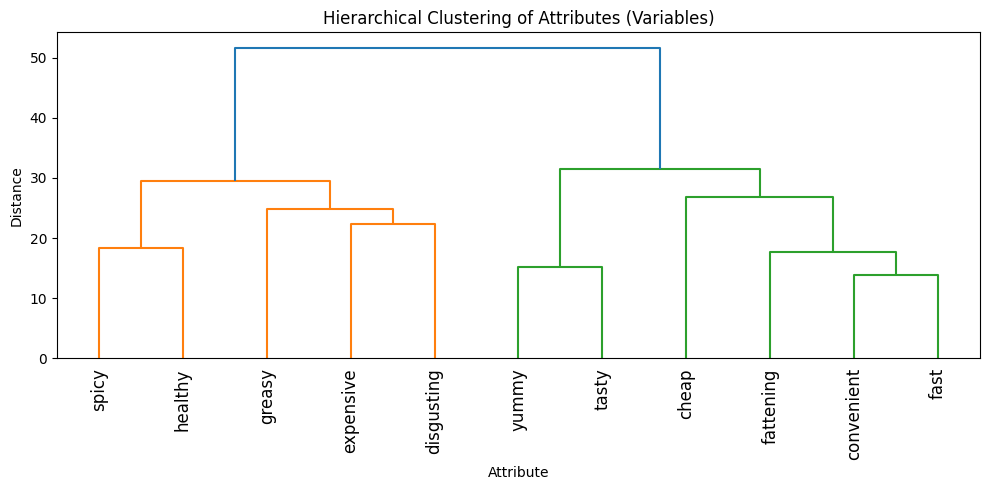

In [365]:
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import seaborn as sns

# Transpose the matrix so variables are rows
X_t = MD_x_binary.T  # shape: (variables, observations)

# Step 1: Compute distance between variables
distance_matrix = pdist(X_t.values, metric='euclidean')  # or 'jaccard', 'hamming' for binary

# Step 2: Hierarchical clustering
linkage_matrix = linkage(distance_matrix, method='ward')  # or 'average', 'complete', etc.

# Step 3: Plot dendrogram of variables
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix, labels=MD_x_binary.columns, leaf_rotation=90)
plt.title("Hierarchical Clustering of Attributes (Variables)")
plt.xlabel("Attribute")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()

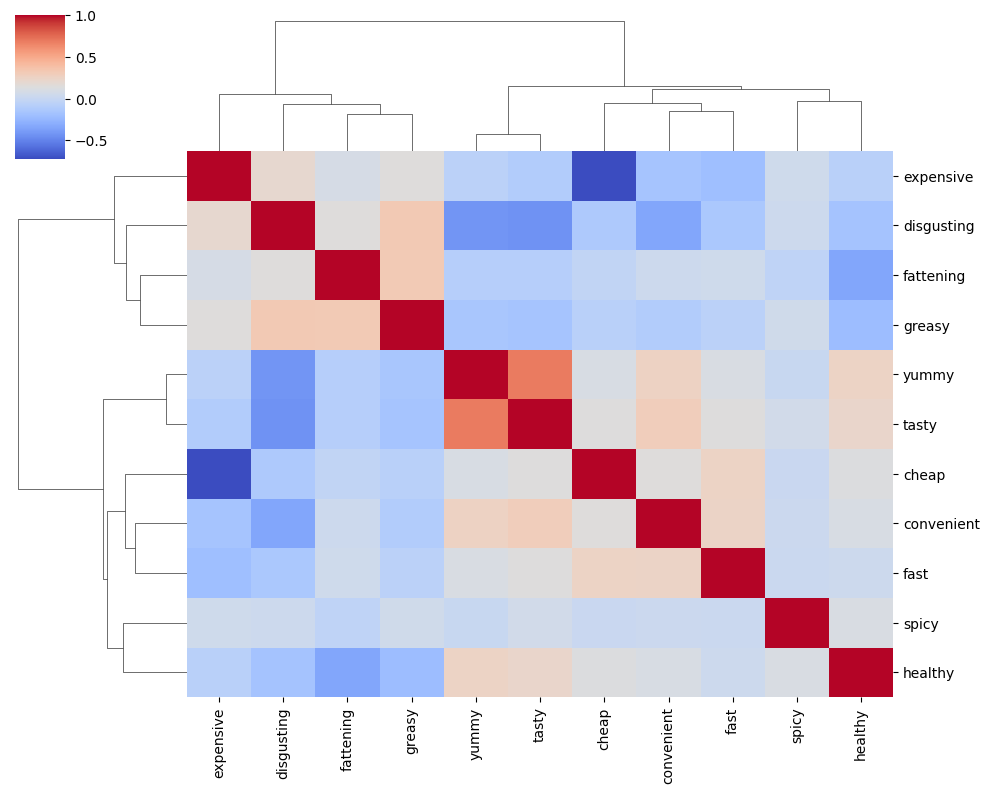

In [366]:
sns.clustermap(MD_x_binary.corr(), method='ward', cmap='coolwarm', figsize=(10, 8))

In [367]:
MD_x_binary

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1
1449,1,1,0,1,0,0,1,1,0,1,0
1450,1,1,0,1,0,1,0,1,1,0,0
1451,1,1,0,0,0,1,1,1,0,1,0


In [368]:
df['cluster']

,cluster
0,0
1,1
2,1
3,1
4,0
...,...
1448,0
1449,1
1450,1
1451,1


In [369]:
MD_x_binary.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting'],
      dtype='object')

In [370]:
# Reuse this if not already done

# Convert YES/NO to binary
binary_cols = df.columns[:11]  # First 11 columns are perception variables
df[binary_cols] = df[binary_cols].map(lambda x: 1 if x == 'Yes' else 0)

kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(MD_x_binary)

# Ensure the binary data and cluster labels are merged
#MD_x_binary['cluster'] = df['cluster']  # copy cluster labels into the binary frame

cluster_profiles = df.groupby('cluster')[binary_cols].mean()
cluster_profiles

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
cluster,,,,,,,,,,,
0,0.020833,0.679167,0.079167,0.916667,0.708333,0.745833,0.066667,0.083333,0.895833,0.062500,0.729167
1,0.887931,0.981034,0.086207,0.794828,0.329310,0.960345,0.922414,0.975862,0.017241,0.320690,0.043103
2,0.022654,0.893204,0.077670,0.925566,0.660194,0.951456,0.919094,0.155340,0.012945,0.071197,0.385113
3,0.851852,0.959877,0.132716,0.904321,0.617284,0.858025,0.108025,0.932099,0.898148,0.203704,0.104938


In [371]:
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage

# Transpose for attribute-level clustering
X_t = MD_x_binary.T.values
attribute_names = MD_x_binary.columns

# Compute clustering
linkage_matrix = linkage(pdist(X_t, metric='euclidean'), method='ward')

# Get order of variables from dendrogram
from scipy.cluster.hierarchy import leaves_list
ordered_indices = leaves_list(linkage_matrix)

# Reverse order (like rev(order) in R)
ordered_attributes = attribute_names[ordered_indices[::-1]]


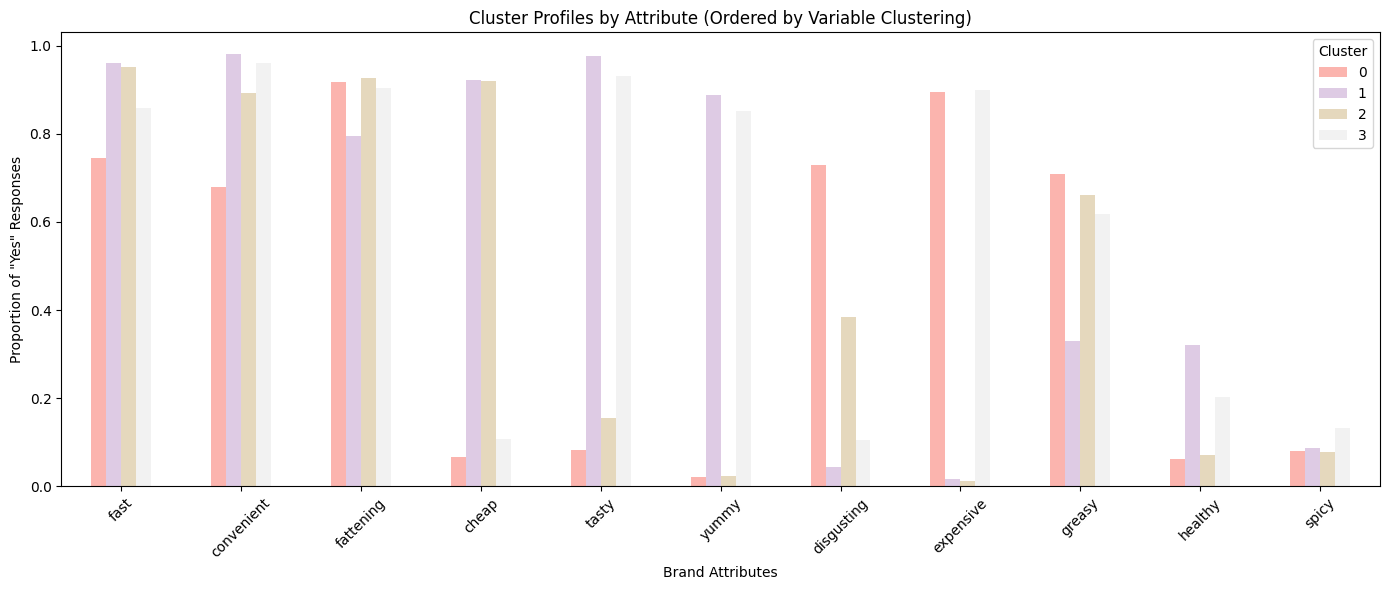

In [372]:
import matplotlib.pyplot as plt

# Reorder columns
cluster_profiles_ordered = cluster_profiles[ordered_attributes]

# Plot
cluster_profiles_ordered.T.plot(kind='bar', figsize=(14, 6), colormap='Pastel1')
plt.title('Cluster Profiles by Attribute (Ordered by Variable Clustering)')
plt.ylabel('Proportion of "Yes" Responses')
plt.xlabel('Brand Attributes')
plt.xticks(rotation=45)
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

In [373]:
# Compute overall average for reference
overall_avg = df[binary_cols].mean()

# Count observations in each cluster
cluster_sizes = df['cluster'].value_counts().sort_index()
total_n = len(df)

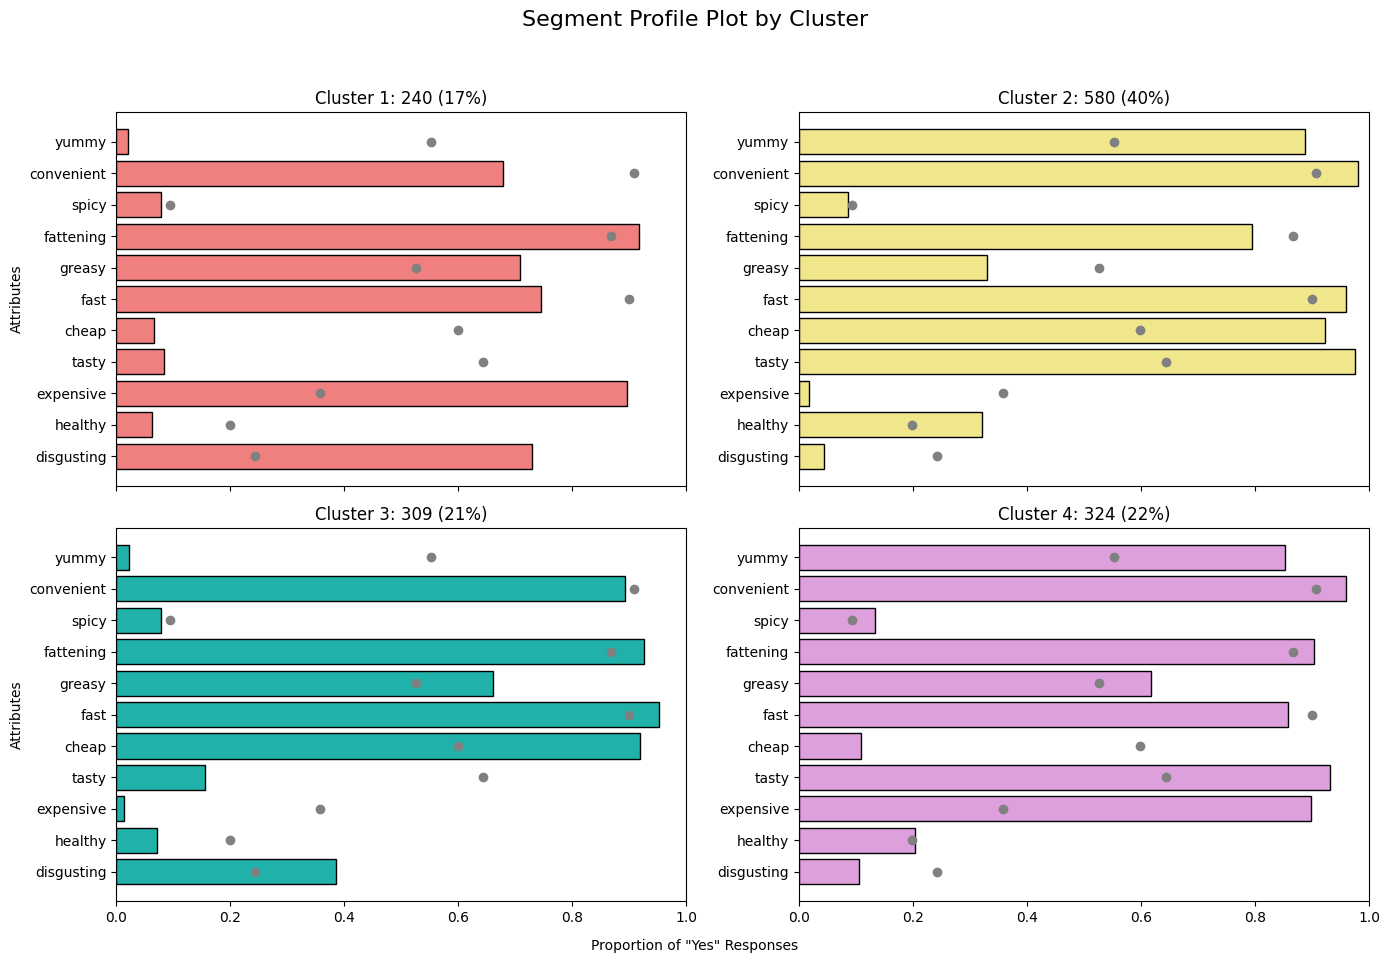

In [374]:
n_clusters = cluster_profiles.shape[0]
attributes = binary_cols.tolist()

fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharex=True)
axes = axes.flatten()

colors = ['lightcoral', 'khaki', 'lightseagreen', 'plum']

for idx, ax in enumerate(axes):
    cluster_id = idx
    profile = cluster_profiles.loc[cluster_id]
    size = cluster_sizes[cluster_id]
    pct = size / total_n * 100

    y_pos = np.arange(len(attributes))

    # Plot bars for this cluster
    ax.barh(y_pos, profile.values, color=colors[idx], edgecolor='black')

    # Plot overall average as grey dots
    ax.plot(overall_avg.values, y_pos, 'o', color='grey', label='Overall')

    # Add labels
    ax.set_yticks(y_pos)
    ax.set_yticklabels(attributes)
    ax.invert_yaxis()
    ax.set_xlim(0, 1)
    ax.set_title(f"Cluster {cluster_id + 1}: {size} ({int(round(pct))}%)")

    if idx % 2 == 0:
        ax.set_ylabel("Attributes")

# Shared x-axis label
fig.text(0.5, 0.04, 'Proportion of "Yes" Responses', ha='center')
fig.suptitle("Segment Profile Plot by Cluster", fontsize=16)
plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.show()

In [375]:
from sklearn.decomposition import PCA

X = MD_x_binary.values  # original binary matrix
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

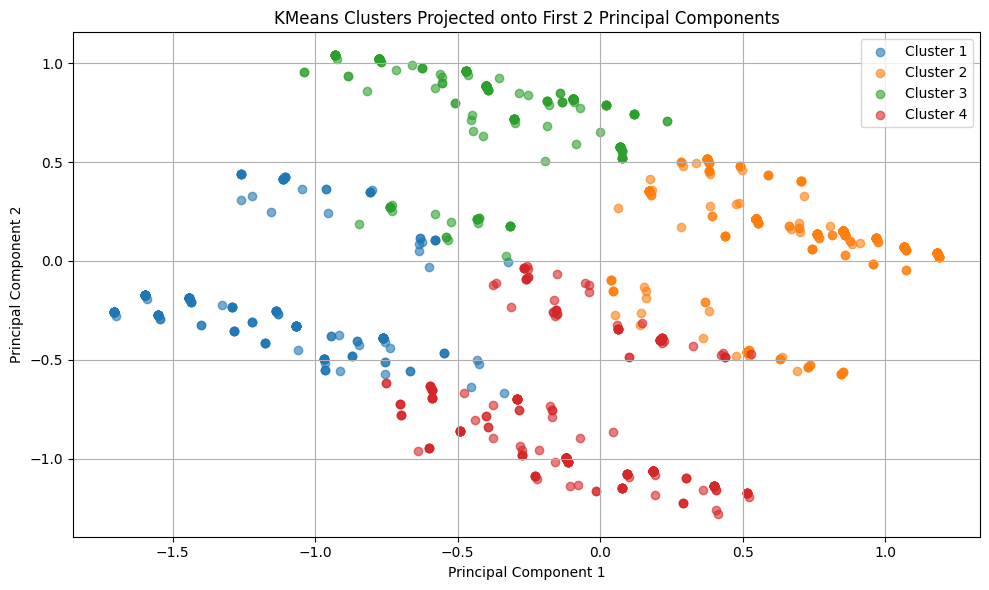

In [376]:
import matplotlib.pyplot as plt

cluster_labels = df['cluster']  # assuming already exists

plt.figure(figsize=(10, 6))

# Scatter plot by cluster
for cluster in sorted(cluster_labels.unique()):
    plt.scatter(
        X_pca[cluster_labels == cluster, 0],
        X_pca[cluster_labels == cluster, 1],
        label=f"Cluster {cluster + 1}", alpha=0.6
    )

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("KMeans Clusters Projected onto First 2 Principal Components")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

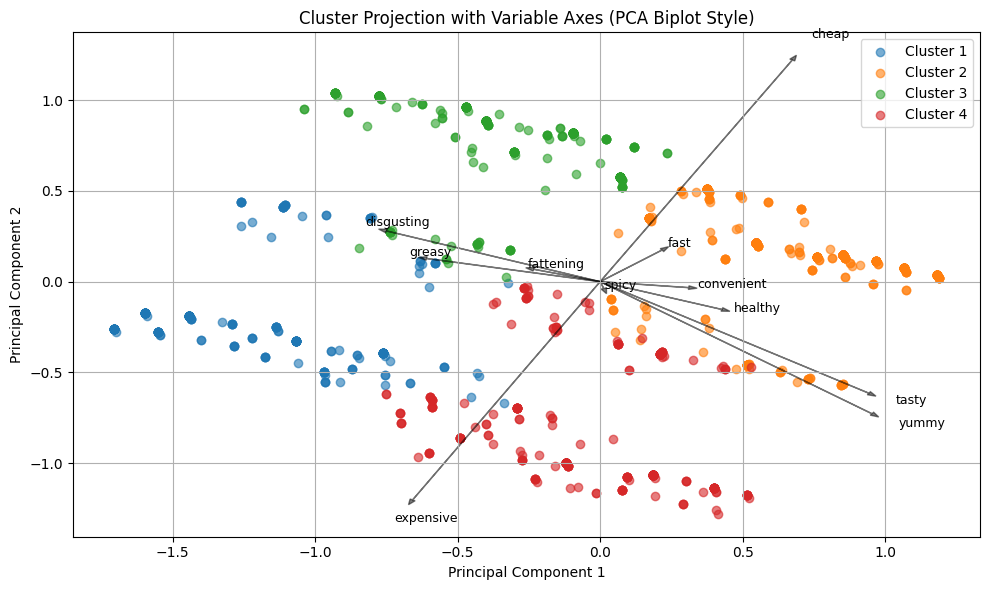

In [377]:
feature_names = MD_x_binary.columns

plt.figure(figsize=(10, 6))

# Plot cluster points again
for cluster in sorted(cluster_labels.unique()):
    plt.scatter(
        X_pca[cluster_labels == cluster, 0],
        X_pca[cluster_labels == cluster, 1],
        label=f"Cluster {cluster + 1}", alpha=0.6
    )

# Add variable axes (loadings)
for i, var in enumerate(feature_names):
    plt.arrow(0, 0, pca.components_[0, i]*2, pca.components_[1, i]*2,
              color='black', alpha=0.5, head_width=0.02)
    plt.text(pca.components_[0, i]*2.2, pca.components_[1, i]*2.2, var, fontsize=9)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Cluster Projection with Variable Axes (PCA Biplot Style)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [378]:
from statsmodels.graphics.mosaicplot import mosaic
import matplotlib.pyplot as plt
import pandas as pd

In [379]:
# Convert Like to numeric if needed
df['Like'] = pd.to_numeric(df['Like'], errors='coerce')

# Build cross-tabulation
mosaic_data = pd.crosstab(df['cluster'], df['Like'])

In [380]:
# Convert to dictionary with tuple keys
mosaic_dict = {(f"Cluster {row}", f"Like {col}"): mosaic_data.loc[row, col]
               for row in mosaic_data.index
               for col in mosaic_data.columns}


<Figure size 1200x600 with 0 Axes>

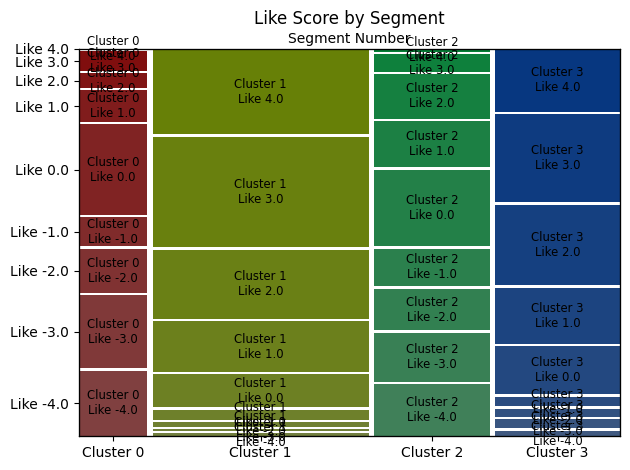

In [381]:
plt.figure(figsize=(12, 6))
mosaic(mosaic_dict, title="Like Score by Segment", gap=0.01)
plt.xlabel("Segment Number")
plt.ylabel("Like Rating")
plt.tight_layout()
plt.show()

In [382]:
# Assume df contains 'cluster' and 'Gender'
mosaic_data = pd.crosstab(df['cluster'], df['Gender'])

In [383]:
mosaic_dict = {
    (f"Cluster {row}", gender): mosaic_data.loc[row, gender]
    for row in mosaic_data.index
    for gender in mosaic_data.columns
}

<Figure size 1000x600 with 0 Axes>

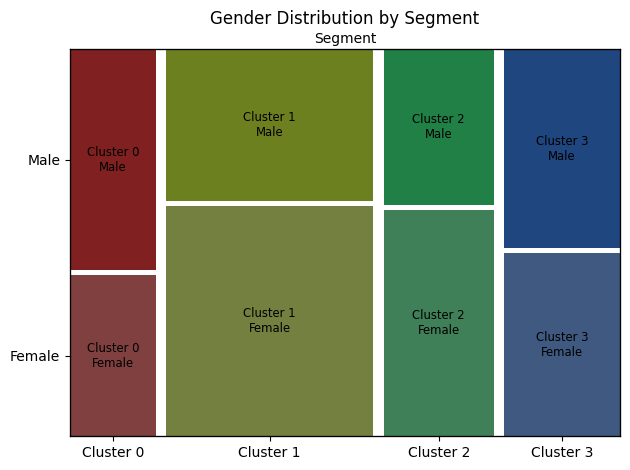

In [384]:
plt.figure(figsize=(10, 6))
mosaic(mosaic_dict, title="Gender Distribution by Segment", gap=0.02)
plt.xlabel("Segment")
plt.ylabel("Gender")
plt.tight_layout()
plt.show()

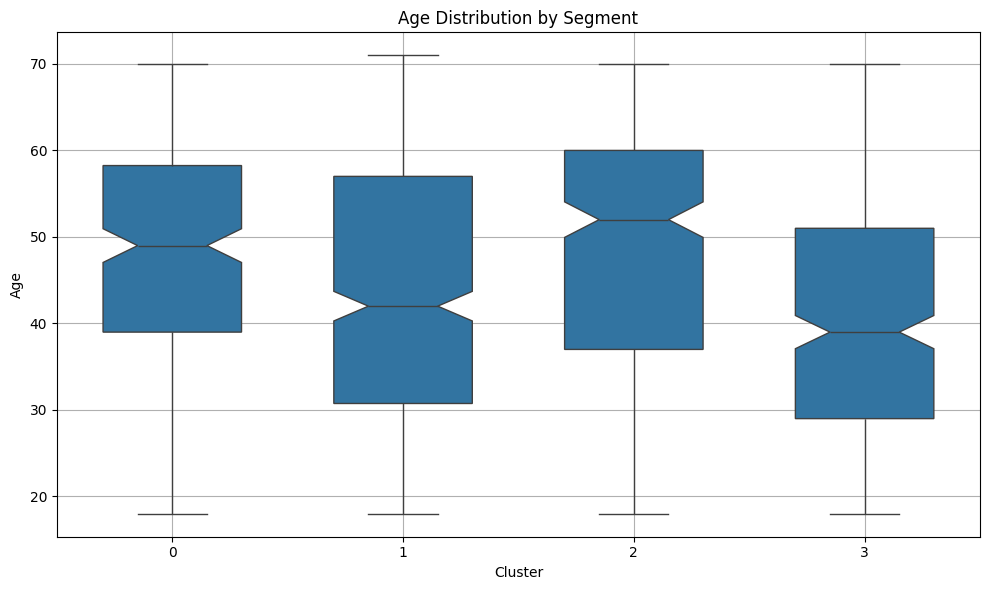

In [385]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df, x='cluster', y='Age',
    notch=True,  # Notches are supported in matplotlib >= 3.4
    width=0.6
)

plt.title('Age Distribution by Segment')
plt.xlabel('Cluster')
plt.ylabel('Age')
plt.grid(True)
plt.tight_layout()
plt.show()

In [386]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Create binary target: 1 if cluster == 2 (Python is 0-based, so Cluster 3 = label 2)
df['is_cluster_3'] = (df['cluster'] == 2).astype(int)

In [387]:
# Encode categorical variables
df['Gender_encoded'] = LabelEncoder().fit_transform(df['Gender'])
df['VisitFreq_encoded'] = LabelEncoder().fit_transform(df['VisitFrequency'])

# Feature matrix and target
features = ['Like_n', 'Age', 'VisitFreq_encoded', 'Gender_encoded']
X = df[features]
y = df['is_cluster_3']

In [388]:
tree_model = DecisionTreeClassifier(max_depth=3, random_state=1234)
tree_model.fit(X, y)

DecisionTreeClassifier(max_depth=3, random_state=1234)

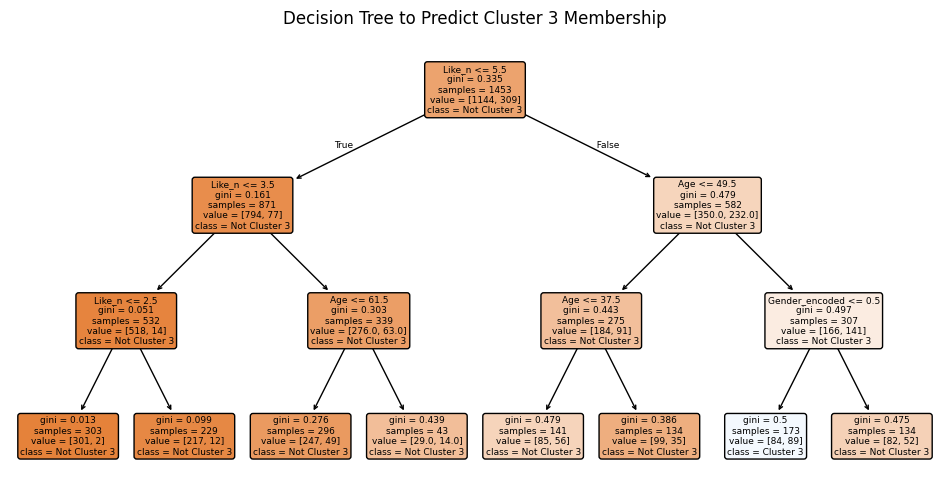

In [389]:
plt.figure(figsize=(12, 6))
plot_tree(tree_model,
          feature_names=features,
          class_names=["Not Cluster 3", "Cluster 3"],
          filled=True, rounded=True)
plt.title("Decision Tree to Predict Cluster 3 Membership")
plt.show()

In [390]:
df['VisitFrequency'].value_counts()

,count
VisitFrequency,
Once a month,439
Every three months,342
Once a year,252
Once a week,235
Never,131
More than once a week,54


In [391]:
# Define your actual order
visit_order = {
    'Never': 1,
    'Once a week': 2,
    'More than once a week': 3,
    'Once a month': 4,
    'Every three months': 5,
    'Once a year': 6
}

# Map to numeric
df['VisitFreq_num'] = df['VisitFrequency'].map(visit_order)

In [392]:
# Group by cluster and take mean
visit_means = df.groupby('cluster')['VisitFreq_num'].mean().sort_index()

print("Average Visit Frequency per Cluster:")
print(visit_means)

Average Visit Frequency per Cluster:
cluster
0    3.925000
1    3.815517
2    4.236246
3    3.941358
Name: VisitFreq_num, dtype: float64


In [393]:
df['Like'].value_counts().sort_values()

,count
Like,
-1.0,58
-2.0,59
-4.0,71
-3.0,73
1.0,152
4.0,160
0.0,169
2.0,187
3.0,229


In [394]:
# As df['Like'] is already on the -5 to +5 scale
# and df['cluster'] contains segment labels

like_means = df.groupby('cluster')['Like_n'].mean().sort_index()

print("Mean Like Score (-5 to +5 scale) per Cluster:")
print(like_means)

Mean Like Score (-5 to +5 scale) per Cluster:
cluster
0    8.675000
1    3.334483
2    7.495146
3    3.879630
Name: Like_n, dtype: float64


In [396]:
df['Gender'].head()

,Gender
0,Female
1,Female
2,Female
3,Female
4,Male


In [395]:
# Convert Gender == "Female" to binary: 1 if Female, 0 otherwise
df['is_female'] = (df['Gender'] == "Female").astype(int)

# Compute mean (i.e., proportion female) per cluster
female_proportions = df.groupby('cluster')['is_female'].mean().sort_index()

print("Proportion of Females per Cluster:")
print(female_proportions)

Proportion of Females per Cluster:
cluster
0    0.420833
1    0.601724
2    0.592233
3    0.478395
Name: is_female, dtype: float64


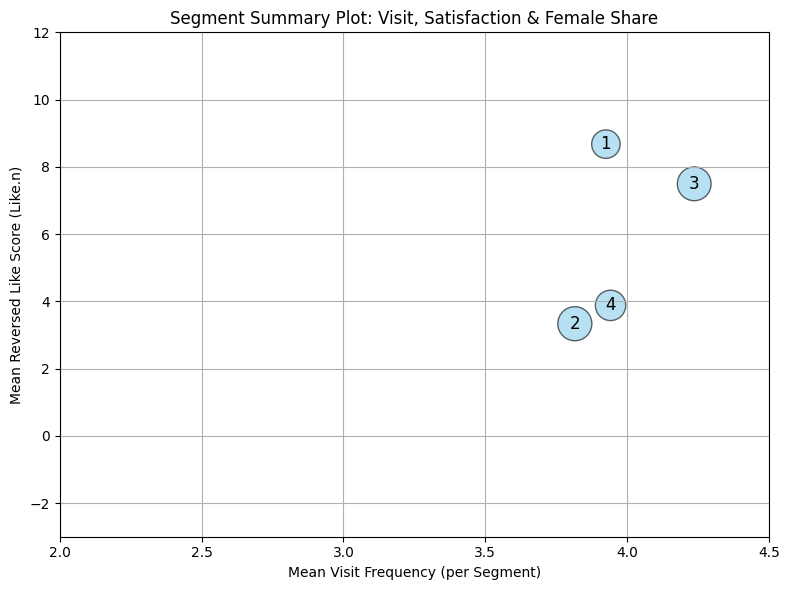

In [400]:
import matplotlib.pyplot as plt

# Convert to aligned arrays
x = visit_means.values              # visit frequency
y = like_means.values               # Like.n (reversed satisfaction)
sizes = 10 * female_proportions.values  # point size scaling
labels = visit_means.index + 1      # cluster labels (1-based)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(x, y, s=sizes*100, alpha=0.6, color='skyblue', edgecolor='black')

# Annotate each point with cluster number
for i, label in enumerate(labels):
    plt.text(x[i], y[i], str(label), fontsize=12, ha='center', va='center')

# Axes limits (matching R)
plt.xlim(2, 4.5)
plt.ylim(-3, 12)

# Labels
plt.xlabel("Mean Visit Frequency (per Segment)")
plt.ylabel("Mean Reversed Like Score (Like.n)")
plt.title("Segment Summary Plot: Visit, Satisfaction & Female Share")

plt.grid(True)
plt.tight_layout()
plt.show()